---
layout: default
title: "Deep Learning - RNN - Word embeddings"
categories: deeplearning
permalink: /ML45/
order: 45
comments: true
---

In [1]:
%pylab --no-import-all inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"
from matplotlib.patches import Rectangle, Circle
from mpl_flow import Flow
from sklearn.manifold import TSNE
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Word embeddings in NLP
One of the field of machine learning being revolutionized by RNN is Natural Language Processing (NLP), a classically complex task due to the very changeling nature of language and the nuances in its meaning. One the key concepts helping with NLP-related tasks is **word embeddings**, a representation for words that let an algorithm learn analogies (e.g. man is to woman, as king is to queen).

## Word embedding intuition
The term **word embedding** and **word vector** are used interchangeably in the literature and they both refer to encoding a word as a series of coordinates that position the word close to thematically related words and far from thematically unrelated words in a high-dimensional feature space.
### Word representation
Up until this point we have been representing words with a vocabulary vector $V$ of a fixed size (let's say 10,000 words) with a word represented by a one-hot vector of size $|V|$

$$
V=\begin{bmatrix}
\small\text{a}\\
\small\text{aaron} \\
\vdots \\
\small\text{zulu}\\
\small\text{<UNK>}
\end{bmatrix}
\qquad
\text{Man}=
\begin{bmatrix}
\small\text{0}\\
\vdots \\
1 \\
\vdots \\
0
\end{bmatrix}
$$

Where we would represent the word `Man` as $O_{5391}$ and the word `Woman` as $O_{9853}$ if these words are at position 5391 and 9853 respectively. This representation has the weakness of treating each word as a separate entity not allowing an algorithm to easily generalize across words. For example suppose we have the two sentences with a blank space:

```
I want a glass of orange ____

I want a glass of apple  ____
```

We can easily see that a word that fits well both blank spaces is `juice`. However, an algorithm that has learned that *I want a glass of **orange** juice* is a likely sentence from the distribution of sentences in our corpus, doesn't necessarily have a similar likelihood for the sentence *I want a glass of **apple** juice*. As far as it knows, the relationship between the words *Apple* and *Orange* is not any closer than the relationship between the words *Apple* and *Man*. In fact the inner product and euclidean distance between any two one-hot vectors is zero since they are all orthogonal.

$$
\begin{split}
& \langle O_x, O_y \rangle = 0 \\
& O_x - O_y = 0
\end{split}
$$

Behind the concept of word embedding, the one-hot representation is replaced by a featurized representation where each word is represented by a set of **learned** features. This new representation is called **embedding**.

|          | Man <br>(5391) | Woman <br>(9853) | King <br>(4914) | Queen <br>(7157)| Apple <br>(456) | Orange<br>(6257) |
|----------|------|-------|-------|-------|-------|--------|
| Gender   | -1   | 1     | -0.95 | 0.97  | 0     | 0.01   |
| Royal    | 0.01 | 0.02  | 0.93  | 0.95  | -0.01 | 0.00   |
| Age      | 0.03 | 0.02  | 0.7   | 0.69  | 0.03  | -0.02  |
| Food     | 0.04 | 0.01  | 0.02  | 0.01  | 0.95  | 0.97   |
| $\vdots$ |      |       |       |       |       |        |

We can now notice that the representation for *Apple* $e_{456}$ and for the word *Orange* $e_{6257}$ are very similar. We expect some of the features to be different but in general their representation should be consistently close. This increases the odds of a learning algorithm to generalize the probability associated to a sentence containing the word *Orange* to the same sentence with the word *Apple*. Learned features are not easily interpretable as the ones used in this example and their exact representation is often hard to figure out.

### Visualizing word embeddings
Once a high-dimensional featurized representation (embedding) is built for each word in a vocabulary, each word will be represented by a high-dimensional vector of feature components. This reflects the reason why they are called embeddings: they are imagined as points *embedded* in a high-dimensional feature-space. It could be useful to visualize the embeddings but it is impossible to represent more than 2-3 dimensions in a plot. To visualize them the high-dimensional space is compressed to a 2D space. The compression method commonly used is the **t-SNE** algorithm ([van der Maaten and Hinton, 2008](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf))

### Relation of word embeddings to face encodings
In face verification and face recognition tasks, input images of faces are represented in vectors called **encodings** (<a href="page:ML40">ML-40</a>). The concept of face encoding and word embedding is very close (not equal) and in the literature the two terms are sometimes used interchangeably.

### Using word embeddings
Let's apply the concept of word embeddings to the named entity recognition example that we have followed throughout <a href="page:ML44">ML-44</a>. Suppose we have the sentences

```
Sally Johnson is an orange farmer

Robert Lin is an apple farmer
```

If the algorithm is trained with the first sentence. Word embeddings will increase the probability of `Robert Lin` being correctly classified as a name. In fact, knowing that `orange` and `apple` are similar will make it easier for the algorithm to correctly classify the rest of the sentence (<a href="#fig:ner">figure below</a>).

Suppose now to replace the words `apple farmer` with the much less common words `durian cultivator`. A small labeled dataset for the named entity training doesn't probably contain the words `durian` and `cultivator`, but if the algorithm has learned a word embedding associating `durian` with fruits and `cultivator` with farmer, it should still be able to generalize well.

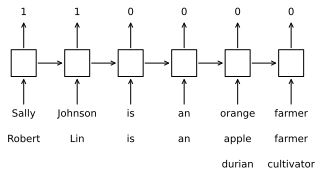

In [2]:
f = Flow(figsize=(5, 3), bbox=dict(boxstyle='square'))

Y = [1,1,0,0,0,0]
sentence_1 = 'Sally Johnson is an orange farmer'
sentence_2 = 'Robert Lin is an apple farmer'
sentence_3 = '    durian cultivator'

for t, (word1, word2, word3, y) in enumerate(zip(sentence_1.split(), sentence_2.split(), sentence_3.split(' '), Y)):
    f.node(f'a{t+1}', label='      \n', startpoint=f'a{t}')
    f.node(f'x{t+1}', label=word1, travel='s', bbox=dict(ec='none'),
           edge_kwargs=dict(arrowprops=dict(arrowstyle='->')), startpoint=f'a{t+1}')
    f.node(f'x2.{t+1}', label=word2, travel='s', bbox=dict(ec='none'), connect=False, startpoint=f'x{t+1}', distance=0.5)
    f.node(f'y{t+1}', label=y, startpoint=f'a{t+1}', travel='n', bbox=dict(ec='none'))
    f.node(f'x3.{t+1}', label=word3, travel='s', bbox=dict(ec='none'), connect=False, startpoint=f'x2.{t+1}', distance=0.5)
        

<i id="fig:ner">An example of a simplified RNN taking variations of a sequence and producing an output.</i>

### Transfer learning of word embeddings
The example in the previous section implies that the word embedding model *knows more* (aka as been trained on a bigger dataset) than the named entity recognition model. In fact, to make full use of word embeddings, they are usually trained on extremely large text corpus, in the range of 1 billion to 100 billion words. On the contrary, a named entity recognition model can be trained on a much smaller dataset, for example 100 thousands words. 

Word embeddings and named entity recognition models don't need to be trained at the same time and are in fact usually trained separately. Pre-trained word embeddings are also freely available with permissive licenses. The knowledge learned by the word embedding model is then **transferred** to the named entity recognition task. 

It is even possible to **finetune** the word embeddings in the task it has ben transferred to, but this is usually done only if such task is trained on a sufficiently big dataset.

### Analogies
Suppose we have a 4-dimensional word embedding as shown in this table and the task and the task of finding an analogy `Man -> Woman as King -> ?`

|          | Man  | Woman | King  | Queen | Apple | Orange |
|----------|------|-------|-------|-------|-------|--------|
| Gender   | -1   | 1     | -0.95 | 0.97  | 0     | 0.01   |
| Royal    | 0.01 | 0.02  | 0.93  | 0.95  | -0.01 | 0.00   |
| Age      | 0.03 | 0.02  | 0.7   | 0.69  | 0.03  | -0.02  |
| Food     | 0.04 | 0.01  | 0.02  | 0.01  | 0.95  | 0.97   |

[Mikolov et al](https://www.aclweb.org/anthology/N13-1090/) first proposed this problem and its solution and this is one of the most surprising and influential results regarding word embeddings that helps the community to better understand word embeddings functioning. They noticed how the difference between the embeddings of `Man` and `Woman` are similar to the difference between the embeddings of `King` and `Queen` 

$$
e_{\text{Man}} - e_{\text{Woman}} = 
\begin{bmatrix} -2 \\ 0 \\ 0 \\ 0 \end{bmatrix} \approx
\begin{bmatrix} -2 \\ 0 \\ 0 \\ 0 \end{bmatrix}
= e_{\text{King}} - e_{\text{Queen}}
$$

The embedding of `Man` differs from the embedding of `Woman` due to a single value (Gender). In a realistic embedding we would have hundreds to thousands of such components, but we can still imagine the embeddings of two words to be different only on one (or few) components. In the high-dimensional feature space of the embedding the difference between the two embeddings is their Euclidean distance. We can imagine the difference of the other set of words in the analogy (`King` and `Queen`) to have a similar (almost parallel) distance vector. In the <a href="#fig:analogy">figure below</a> it is shown an oversimplified representation of this parallelism. Do notice that, should the bi-dimensional feature space used in the plot be produced by the t-SNE algorithm, this parallelism would not be preserved due to the highly non-linear nature of t-SNE.

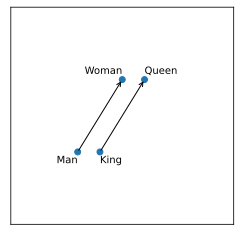

In [3]:
fig, ax = plt.subplots(figsize=(4, 4))
p1 = np.array([0.2, 0.2])
p2 = np.array([0.4, 0.4])
plt.plot(np.hstack([p1, p2]), marker='o', ls='')
plt.annotate('', (0, 0.2), (2, 0.4), arrowprops=dict(arrowstyle='<-'))
plt.annotate('', (1, 0.2), (3, 0.4), arrowprops=dict(arrowstyle='<-'))

plt.text(0, 0.19, 'Man', va='top', ha='right')
plt.text(1, 0.19, 'King', va='top', ha='left')
plt.text(2, 0.41, 'Woman', va='bottom', ha='right')
plt.text(3, 0.41, 'Queen', va='bottom', ha='left')

plt.gca().set_xlim(-3, 7)
plt.gca().set_ylim(0, .6)
ax.set_xticks([])
ax.set_yticks([]);

<i id="fig:analogy">A simplified representation of how an analogous relationship between words would look in the highly dimensional feature space of the embeddings. The arrows represent the distance between two similar words. Arrows between analogous concepts would be parallel(ish)</i>

To correctly identify the right word to complete the analogy an algorithm would need to set a value of $e_?$ that satisfies the condition

$$
e_{\text{Man}} - e_{\text{Woman}} \approx e_{\text{King}} - e_{\text{?}}
$$

The algorithm needs to find the word $w$ so that it maximizes the similarity $\text{sim}$ between the two differences

$$
\arg\max_w \; \text{sim}(e_w, e_\text{King} - e_\text{Man} + e_\text{Woman})
$$

The similarity function $\text{sim}$ most commonly used is the **cosine similarity**, defined as:

$$
\text{sim}(u,v) = \frac{u^Tv}{\| u \|_2 \| v \|_2}
$$

where the numerator is basically the inner product between $u$ and $v$ ($u^Tv = \langle u, v \rangle$). If $u$ and $v$ are very similar (parallel) the inner product will tend to be large; if they are very different (orthogonal) the inner product will tend to 0. This similarity function is called cosine similarity because it computes the cosine between the vectors $u$ and $v$ (<a href="#fig:cosine">figure below</a>): 

* $\cos = 1$ when the angle $\phi=0$ (parallel, same direction)
* $\cos = 0$ when the angle $\phi=90^{\circ}$ (orthogonal)
* $\cos = -1$ when the angle $\phi=180^{\circ}$ (parallel, opposite direction)

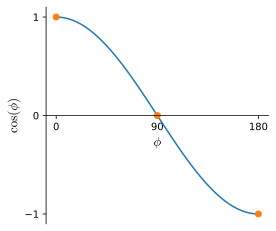

In [4]:
x = np.linspace(0, np.pi)
y = np.cos(x)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(np.degrees(x), y)

x2 = np.linspace(0, np.pi, 3)
y2 = np.cos(x2)
ax.plot(np.degrees(x2), y2, ls='', marker='o')
ax.set_xticks(np.degrees(x2))
ax.set_yticks(y2)
ax.set_xlabel('$\\phi$', fontsize=13)
ax.set_ylabel('$\\cos(\\phi)$', fontsize=13)
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

<i id="fig:cosine">Cosine function for values of the angle $\phi$ between to vectors in the range $[0, \pi]$</i>

## Learning Word embeddings

### Embedding matrix
The task of learning word embeddings produces an **embedding matrix**. Supposing to have a corpus of $n$ words and and learning $m$ features for each word. We would have an $m \times n$ embedding matrix $E$. Each column of $E$ is the embedding of one word in the vocabulary. 

$$
\small
\begin{aligned}[b]
& \begin{matrix} &&& \text{a} & \dots & \text{orange}\; & \dots & \text{zulu} & \end{matrix}\\ 
&E = \begin{bmatrix}
E_{1,1}       & \cdots    & E_{1,6257} & \cdots  & E_{1,10000}  \\ &&\vdots&&\\ \\ \\ 
\end{bmatrix} \\ 
\end{aligned} \qquad
O = 
\begin{bmatrix}
0\\ \vdots \\ 1 \\ \vdots \\ 0 
\end{bmatrix}
$$

Multiplying the embedding matrix $E$ with the one-hot vector representation of one word $j$ the vocabulary $O$ will have the effect of selecting the embedding for word $j$ from the embedding matrix.

$$
E \cdot o_j = e_j
$$

The embedding matrix is $m \times n$ dimensional and the one-hot vector $O_j$ is $n \times 1$ dimensional. The multiplication will produce an $m \times 1$ vector which just reports the column $j$ of matrix $E$, since $j$ is the only at which $o_j$ has non-zero value.

### Embedding learning intuition
Deep learning models regarding word embedding started off as rather complicated algorithms and, along the years, have been gradually simplified without sacrificing their performance, especially when trained on large datasets. Mirroring this process, it is maybe easier to get an intuition of word embedding algorithms starting from more complex formulations and gradually simplifying them to get to modern standards.


#### Neural language model
Given the task of predicting the missing word from a sentence, as for example

```
I want a glass of orange ______.
```

the authors of [Benjo et. al., 2003](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf) built a language model. They would codify each word as a one-hot vector $o_j$ and obtain the word embedding $e_j$. This produces a series of high-dimensional embeddings, which are fed into a neural network layer, which in turn feeds to a softmax classifier (<a href="#fig:neurallanguagemodel">figure below</a>). The softmax clasifier outputs a vector with the same dimension as the training vocabulary, so that it can select any word from it to fill the missing word. The neural network layer has its own parameters ($W^{[1]}, b^{[1]}$) as well as the softmax layer ($W^{[2]}, b^{[2]}$)

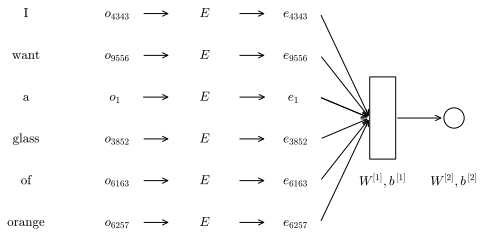

In [5]:
sentence = 'I want a glass of orange'.split()
idxs = [4343, 9556, 1, 3852, 6163, 6257]

fig, ax = plt.subplots(figsize=(8, 4))
f = Flow(ax=ax, bbox=dict(ec='none', fc='none'), fontsize=13)

for t, (word, idx) in enumerate(zip(sentence, idxs)):
    f.node(f'w{t}', label=f'$\\mathrm{{{word}}}$', travel='s', startpoint=f'w{t-1}', connect=False)
    f.node(f'o{t}', label=f'$o_{{{idx}}}$'.center(15), startpoint=f'w{t}', connect=False)
    f.node(f'E{t}', label='$E$'.center(15), startpoint=f'o{t}')
    f.node(f'e{t}', label=f'$e_{{{idx}}}$'.center(15), startpoint=f'E{t}')
    
f.node('l1', label='\n\n\n', bbox=dict(ec='k', boxstyle='square', pad=1), 
       startpoint='e2', travel='se', distance=(1, 0.5), edge_kwargs=dict(tailport='e', headport='w'))

for t in range(len(sentence)):
    f.edge(f'e{t}', 'l1', tailport='e', headport='w')

f.node('l2', label=' ', bbox=dict(boxstyle='circle', ec='k', pad=.3), distance=.8)
f.node('xl1', label='$W^{[1]}, b^{[1]}$', travel='s', distance=1.5, startpoint='l1', connect=False)
f.node('xl2', label='$W^{[2]}, b^{[2]}$', travel='s', distance=1.5, startpoint='l2', connect=False);

<i id="fig:neurallanguagemodel">The architecture of a neural language model applied to a sentence.</i>

Looking at the example in <a href="#fig:neurallanguagemodel">the figure above</a>, given 300 dimensional word embeddings the input fed to the neural network will be a 1800 input vector, composed by the 6 embedding vectors (one per word) stacked together. 

A common alternative is that of using a **fixed historical window**, where a fixed number of past time-steps (words in this case) are fed to the neural network layer to produce a prediction for the current time-step. The width of the window would be an additional hyperparameter that needs to be set manually, however this approach allow to process arbitrarily long sentences without changing the computation time.

The model represented in <a href="#fig:neurallanguagemodel">the figure above</a>, can be used to train word embeddings. In this model, the parameters are the embedding matrix $E$, the parameters of the neural network $W^{[1]}, b^{[1]}$ and those of the softmax layer $W^{[2]}, b^{[2]}$. For each word in your text corpus, backpropagation can be used to perform gradient descent to maximize the likelihood to that word given the preceding word in the window. 

For the task of building a language model, upon which we built our example, using as context a few preceding words is natural. However, if the task is to learn word embeddings various contexts can be used and researchers have experimented with various context combinations:

* A few preceding words: the earliest approach, shown in the example  
* A few preceding and following words: this approach gives context from later part of the sentence respect to the target word
* A single immediately preceding word: a much simpler model
* A single nearby word: a **skip-gram model**; a simple model that works surprising well

## Word2Vec
The Word2Vec algorithm ([Mikolov et al., 2013](https://arxiv.org/abs/1301.3781)) is a simpler and thus more computationally efficient way of learning word embeddings compared to the algorithm examined so far. The Word2Vec algorithm is built on two alternative models the **skip-gram** model and the **CBow model** (Continuous Bag Of Words model).

The skip-gram model generates a number of context-to-target pairs. The CBow model uses the surrounding context from a middle word.

### Skip-gram model
Suppose we have the following sentence in our training text corpus

`I want a glass of orange juice to go along with my cereal`

The skip-gram model randomly picks a word to be the *Context* and a word to be the *Target*. So for example, we could have

In [6]:
t = [['orange', 'juice'], ['orange', 'glass'], ['orange', 'my']]
pd.DataFrame(t, index=[f'Example {i+1}' for i in range(len(t))], 
             columns=['Context', 'Target'])

,Context,Target
Example 1,orange,juice
Example 2,orange,glass
Example 3,orange,my


So we set up a supervised learning problem where, given a context word, the algorithm is asked to predict a randomly chosen word in a $\pm w$ window of input context words, where $w$ is the size of the window. While this is a very hard learning problem, the goal of setting up this supervised learning problem is not to optimize the performance on *this* learning problem per se, instead this learning problem is used to learn word-embeddings.


Given a vocabulary of size $n$, we want to map the context ($c \equiv x$) to the target ($t \equiv y$). Supposing that the representation of the context and the target are tow one-hot vectors $o_c, o_t$, encoding for their position in the vocabulary, we have

$$
\begin{equation}
\begin{array} \\ E \\ o_c \end{array} \to E \cdot o_c \to e_c \to \underset{\small\text{softmax}}{\bigcirc} \to \hat{y}
\end{equation}
\label{eq:skipgram} \tag{1}
$$

where the softmax layer, which returns the probability of the target given the context $p(t \vert c)$ defined as

$$
\underset{\small\text{softmax}}{\bigcirc}: p(t \vert c) = \frac{e^{\theta_t^Te_c}}
{\sum_{j=1}^{n}e^{\theta_j^Te_c}}
$$

where $\theta_t$ is the parameter associated with the output $t$ (the probability of $t$) and the bias were omitted for clarity. The loss function $\mathcal{L}$ of this model would be the usual loss for softmax: 

$$
\mathcal{L}(\hat{y},y)=-\sum_{i+1}^n y_i \log \hat{y}_i 
$$

with $y$ (target $t$) being represented as a one-hot vector encoding for the position of the target $t$ in the vocabulary and similarly $\hat{y}$ being a $n$-dimensional vector produced by the softmax layer, containing the probabilities for each word in the vocabulary.

The overall skip-gram model $\eqref{eq:skipgram}$ will have the embedding parameters $E$ and the softmax unit parameters $\theta_t$. The optimization of the loss function $\mathcal{L}({\hat{y}, y})$ with respect to all parameters ($E, \theta_t$), the skip-gram model will learn surprisingly good embeddings.

#### Sampling the context
Once $c$ is sampled, $t$ is sampled in a $\pm w$ window. But how is $c$ chosen? One possibility is to have a uniformly random sample. This will have the effect of sampling frequent words more frequently, where frequent words also tend to be less informative words like `the`, `of`, `a`, `and` and so on.

In practice this is not desirable because it means that many training steps will be spent updating $e_c$ on a $c \to t$ mapping where the context $c$ is not so relevant. To balance out the frequency of these words, the distribution $P(c)$ is not taken uniformly random from the corpus but heuristics are used to balance out sampling from common words versus sampling from less common words.

#### Computational cost of softmax
There are problems with the computational speed of the skip-gram model with softmax, in particular, each time the probability $p(t \vert c)$ is evaluated, a sum over $n$ elements needs to be carried out, with $n$ possibly reaching millions.

To resolve this issue, an laternative approach to the standard softmax is applied, called **hirearchical softmax**. A hierarchical softmax classifier is built of many binary classifiers organized hierarchically, where each binary classifier tells if the target $t$ is in the first or the second half of the previous input (<a href="#fig:hirearchicalsoftmax">figure below</a>). This scales the computational cost to $\log \vert n \vert$. 

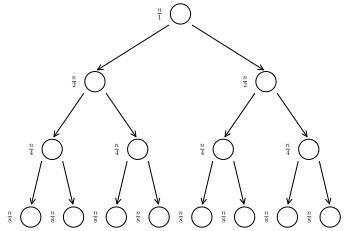

In [9]:
f = Flow(direction='s', bbox=dict(boxstyle='Circle'), fontsize=13)
for l in range(1, 5):
    for c in range(1, 2**(l-1)+1):     
        direction = 'se' if c % 2 == 0 else 'sw'
        startpoint=f'{l-1}-{int(np.ceil(c/2))}'
        f.node(f'{l}-{c}', label=' ', travel=direction, distance=(1/2**(l-1), 1), 
               startpoint=startpoint, edge_kwargs=dict(headport='n'), 
               xlabel=f'$\\frac{{n}}{{{2**(l-1)}}}$', xlabel_xy=(-.5, .5))

<i id="fig:hirearchicalsoftmax">Hierarchical softmax. Each node is a binary classifier that splits its input in two halves and determines if the target $t$ is the first or second half </i>

Acutal implementation of a hierarchical softmax classifier would not split the input in halves but it would have more common words (word encountered more frequently in the corpus) in shallow layers and more rare words in deep layers. This detail increase the likelyhood of stopping in early layers without traversing all layers of the tree and has the effect of further speeding up computation for the majority of words.

## Negative Sampling
The downside of the Word2Vec algorithms is the computational cost of the softmax layer. The **Negative sampling** modifies the learning problem to have a very similar results as the skip-gram model but  with a much more efficient learning algorithm.

Negative sampling ([Mikolov et. al. 2013](https://papers.nips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf)), by Google, poses a different learning problem: given a pair of words (`orange`, `juice`), is this a context-target pair?

To train a model on this problem, given a sentence

```
I want a glass of orange juice to go along with my cereal
```

we build a training set by selecting a context word $c$, and associating it to a target word $t$ by labeling the pair as 1 $(y=1)$. Then we would randomly pick $k$ words ($t$) from the corpus text and always labeling these pair $(c, t)$ as $y=0$, where $k$ is in the range $[5, 20]$ for smaller datasets and $[2, 5]$ for very large datasets.

In [25]:
t = [['orange', 'juice', 1], ['orange', 'king', 0], ['orange', 'book', 0], ['orange', 'the', 0], ['orange', 'of', 0]]
c=pd.MultiIndex.from_arrays([['$x$', '$x$', '$y$'], ['context $(c)$', 'word $(t)$', 'target?']])
pd.DataFrame(t, columns=c).style.hide_index().set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

The supervised learning problem predicts if an input pair of words ($x$) is a context-target pair ($\hat{y}$). In other words the learning algorithm needs to distinguish between the two distribution of manually labeled positive target words and randomly picked negative target words.

The model to learn the mapping $x \to y$ is basically a logistic regression model that outputs the probability of $y=1$, given the pair $c,t$ (<a href="#fig:negsamp">figure below</a>)

$$
P(y=1 \vert c,t) = \sigma \left(\theta^T_te_c \right )
$$

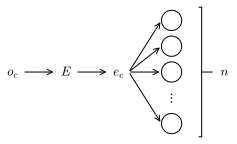

In [69]:
f = Flow(bbox=dict(ec='none', boxstyle='circle'), fontsize=13, figsize=(4, 2))
f.node(label='$o_c$')
f.node(label='$E$')
f.node(label='$e_c$')
f.node(label=' ', bbox=dict(ec='k'), travel='ne', distance=(1, 2), 
      edge_kwargs=dict(headport='w', tailport='e'))
for i in range(4):
    opts = dict(label=' ', bbox=dict(ec='k')) if i != 2 else dict(label=r'$\vdots$')
    f.node(**opts, startpoint=i+4, travel='s', connect=False)
    if i !=2:
        f.edge(3, i+5, headport='w', tailport='e')
f.node(travel='e', label='$n$', startpoint=6, 
       edge_kwargs=dict(arrowprops=dict(shrinkB=20, arrowstyle='-[,widthB=5.0,lengthB=0.2,angleB=0')));

<i id="fig:negsamp">Negative sampling model architecture. The context word $o_c$ selects its embedding $e_c$ and feeds to $n$ logistic regression units where $n$ is the size of the vocabulary. Each binary classifier elects the pair $(c,t)$ to a context-target pair</i>

The context word $c$, represented as a one-hot vector $o_c$ selects its embedding representation $e_c$ from the embedding matrix $E$ and then feeds to as many logistic regression units as the number of words in the vocabulary ($n$). Each logistic regression unit produce a binary classification that tells if the the pair $(c,t)$ is a context-target pair. However, instead of training all $n$ binary classifiers at every iteration, only $k+1$ of them are trained, where $k$ is the number of **negative samples** drawn from the text corpus and the $+1$ is the known positive example.

Negatives examples sampling suffer from the same problem as the context sampling in the skip-gram model. The authors of [Mikolov et. al. 2013](https://papers.nips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf) empirically determined that a good sampling distribution is an heuristic value in-between sampling from the observed distribution in the corpus and sampling from a uniformly random distribution. Their sampling is proportional to the frequency of the word to the power of $3/4$

$$
P(w_i) = \frac{f(w_i)^{\frac{3}{4}}}{\sum_{j=1}^nf(w_j)^{\frac{3}{4}}}
$$

where $f(w_i)$ is the frequency of the word in the text corpus.

## GloVe word vectors
A very simple algorithm for calculating word embedding is the **GloVe** (GLObal VEctor) algorithm, from [Pennington et. al., 2014](https://nlp.stanford.edu/pubs/glove.pdf).

In the GloVe algorithm, given two words $i$ and $j$, we define $X_{ij}$ as the number of times $j$ appears in the context of $i$. 

In the GloVe algorithm, the context is defined as a window of size $\pm w$ and it is, thus, symmetrical. This leads to $X_{ij}=X_{ji}$, which would not be true if the context were not symmetrical, for example if the context were defined as $w$ following or preceding words. Since the relation is symmetrical,  we are dropping the notation $c, t$ (which implies a directionality) in favor of the notation of the original work $i, j$. However the two notations can be used interchangeably.

The GloVe model optimization objective is to minimize a loss function that revolves around the difference between $\theta^T_ie_j$ minus $-\log X_{ij}$, where the first term is the inner product of the two vectors and the second term is their co-occurrence frequency. So the loss function is measuring how much the inner product $\langle i, j \rangle$ is a good predictor of the co-occurrence frequency of $i$ and $j$.

$$
J = \sum_{i=1}^n \sum_{j=1}^n f\left(X_{ij}\right)\left(\theta_i^Te_j+b_i + b_j' - \log X_{ij}\right)^2
$$

where $(f{X_ij})$ is a weighting term that plays two roles:
 
* it assumes the value 0 if $X_{ij}=0$, in order to prevent the computation of $\log 0$, which is undefined
* it shrink the frequency of stop-words (`this`, `of`, ...) while increasing the frequency of rare non stop-words in the corpus

The original work contains further detail on how the heuristic function $f(X_{ij})$ is set to achieve similar results and how different implementations affect the algorithm.

Since the relationship between $i$ and $j$ is symmetrical (unlinke what we have seen in previous algorithm for $c$ and $t$), the final embedding vector for a certain word $z$, is calculated taking the average between $e_z$ and $\theta_z$

$$
e_z^{\text{final}} = \frac{e_z+\theta_z}{2} 
$$